In [14]:
from __future__ import print_function
import pandas as pd
import seaborn as sns
from matplotlib import pyplot

import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
sns.set_context('paper')



def print_ln():
    print('-' * 80, '\n')




import h2o
h2o.init(min_mem_size='27G')

DATA_LOCATION = "../../data/"
MODELS_LOCATION = "../../models/"

MAX_MODELS = 10



Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,10 mins 03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,5 months and 6 days !!!
H2O_cluster_name:,H2O_from_python_azureuser_cbymt8
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,23.59 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [15]:
binarized_final_df = pd.read_csv(DATA_LOCATION + "processed/final.binarized_final_monolabel_df.tsv", "\t", index_col= 'SampleID')
binarized_final_df.head()

,NC000962_3.22,NC000962_3.434,NC000962_3.524,NC000962_3.645,NC000962_3.648,NC000962_3.654,NC000962_3.666,NC000962_3.675,NC000962_3.678,NC000962_3.693,...,NC000962_3.4410251,NC000962_3.4410260,NC000962_3.4410272,NC000962_3.4410278,NC000962_3.4410728,NC000962_3.4410850,NC000962_3.4411016,NC000962_3.4411170,NC000962_3.4411327,Resistance_Status
SampleID,,,,,,,,,,,,,,,,,,,,,
ERR027458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
ERR027459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
ERR027460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
ERR027461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
ERR027462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [21]:
binarized_final_frame = h2o.import_file(DATA_LOCATION + "processed/final.binarized_final_monolabel_df.tsv")


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [16]:
train_df = pd.read_csv(DATA_LOCATION + "processed/final.train.tsv", "\t", index_col= 'SampleID')
train_df.head()

,NC000962_3.22,NC000962_3.434,NC000962_3.524,NC000962_3.645,NC000962_3.648,NC000962_3.654,NC000962_3.666,NC000962_3.675,NC000962_3.678,NC000962_3.693,...,NC000962_3.4410251,NC000962_3.4410260,NC000962_3.4410272,NC000962_3.4410278,NC000962_3.4410728,NC000962_3.4410850,NC000962_3.4411016,NC000962_3.4411170,NC000962_3.4411327,Resistance_Status
SampleID,,,,,,,,,,,,,,,,,,,,,
SRR10525336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
SRR10380004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
SRR6807701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
SRR11033700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
SRR1163101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [22]:

train_frame = h2o.import_file(DATA_LOCATION + "processed/final.train.tsv")


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [17]:
test_df = pd.read_csv(DATA_LOCATION + "processed/final.test.tsv", "\t", index_col= 'SampleID')
test_df.head()

,NC000962_3.22,NC000962_3.434,NC000962_3.524,NC000962_3.645,NC000962_3.648,NC000962_3.654,NC000962_3.666,NC000962_3.675,NC000962_3.678,NC000962_3.693,...,NC000962_3.4410251,NC000962_3.4410260,NC000962_3.4410272,NC000962_3.4410278,NC000962_3.4410728,NC000962_3.4410850,NC000962_3.4411016,NC000962_3.4411170,NC000962_3.4411327,Resistance_Status
SampleID,,,,,,,,,,,,,,,,,,,,,
ERR3335735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
SRR8552929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
ERR067629,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
ERR067714,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
SRR5065314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [23]:

test_frame = h2o.import_file(DATA_LOCATION +  "processed/final.test.tsv")


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [54]:
index_col = 'SampleID'

# Identify predictors and response columns
predictor_cols = train_frame.columns
response_col = "Resistance_Status"

# Remove the index and response columns from predictor_columns list
predictor_cols.remove(index_col)
predictor_cols.remove(response_col)



# print("train frame - predictor column: ", predictor_cols[0], predictor_cols[-1])
# print("train frame - response column: ", response_col)


# print("test frame - predictor columns: ", predictor_cols[0], predictor_cols[-1])
# print("test frame - response column: ", response_col)

train frame - predictor column:  SampleID Resistance_Status
test frame - predictor columns:  SampleID Resistance_Status


In [25]:
# For binary classification, response should be a factor
train_frame[response_col] = train_frame[response_col].asfactor()
test_frame[response_col] = test_frame[response_col].asfactor()

x = predictor_cols
y = response_col

In [ ]:
from h2o.estimators import H2OPrincipalComponentAnalysisEstimator

pca300 = H2OPrincipalComponentAnalysisEstimator(
                                                   k = 300,
)

pca300.train(x=x, y=y, training_frame=binarized_final_df)


In [ ]:
# save the model
# model_path = h2o.save_model(model= my_pca, path="../models/my_pca_model", force=True)

model_path = MODELS_LOCATION + "PCA300/PCA_model_python_1603962989759_1_k300"

# load the model
pca300 = h2o.load_model(model_path)


In [26]:
pca300_df = pca300.summary().as_data_frame().set_index("")
pca300_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc291,pc292,pc293,pc294,pc295,pc296,pc297,pc298,pc299,pc300
,,,,,,,,,,,,,,,,,,,,,
Standard deviation,8.748536,4.715628,3.877237,3.107335,2.784571,2.583031,2.371838,1.989349,1.914256,1.835004,...,0.241208,0.240459,0.239932,0.239419,0.238373,0.237840,0.237656,0.237487,0.236259,0.236189
Proportion of Variance,0.319086,0.092708,0.062673,0.040254,0.032326,0.027816,0.023453,0.016499,0.015277,0.014038,...,0.000243,0.000241,0.000240,0.000239,0.000237,0.000236,0.000235,0.000235,0.000233,0.000233
Cumulative Proportion,0.319086,0.411794,0.474467,0.514722,0.547048,0.574864,0.598318,0.614817,0.630094,0.644132,...,0.931150,0.931391,0.931631,0.931870,0.932107,0.932342,0.932578,0.932813,0.933046,0.933278


<AxesSubplot:ylabel='Cumulative Proportion'>

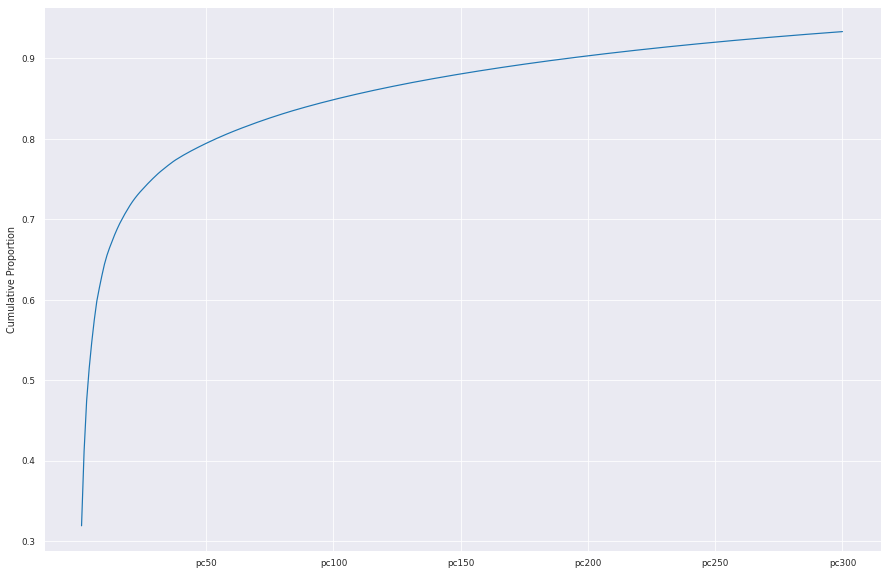

In [27]:
a4_dims = (15, 10)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax.set_xticks([49,99,149, 199, 249, 299])
sns.lineplot(ax=ax, data= pca300_df.loc['Cumulative Proportion'])


## Create the PCA transformed predictor columns

In [30]:
train_frame_pca = pca300.predict(train_frame[predictor_cols])
h2o.export_file(frame=train_frame_pca, path= DATA_LOCATION + "processed/final.train_frame.pca300.tsv", force=True)


# train_frame_pca = h2o.import_file(DATA_LOCATION + "processed/final.train_frame.pca300.tsv")
train_frame_pca.head()

pca prediction progress: |████████████████████████████████████████████████| 100%
Export File progress: |███████████████████████████████████████████████████| 100%


PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,PC126,PC127,PC128,PC129,PC130,PC131,PC132,PC133,PC134,PC135,PC136,PC137,PC138,PC139,PC140,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,PC150,PC151,PC152,PC153,PC154,PC155,PC156,PC157,PC158,PC159,PC160,PC161,PC162,PC163,PC164,PC165,PC166,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176,PC177,PC178,PC179,PC180,PC181,PC182,PC183,PC184,PC185,PC186,PC187,PC188,PC189,PC190,PC191,PC192,PC193,PC194,PC195,PC196,PC197,PC198,PC199,PC200
-7.21528,5.48779,-0.0457426,-3.29582,-8.02517,-2.94974,-2.96759,-2.26629,-0.652408,0.578522,0.182181,0.434753,2.51645,-2.40717,-0.0528002,-0.867347,-0.77548,0.779273,-0.362249,-0.189216,-1.43005,0.0339925,0.0361673,-0.59373,0.642088,-0.0192343,0.0159929,0.10032,-2.14885,0.72847,-0.426612,-2.17743,0.564177,-0.419728,-0.040311,0.174175,0.0958375,-0.840905,-0.412918,0.0362403,-1.12543,1.47642,-0.288826,0.204485,0.970888,0.830999,0.392813,-0.160212,0.045166,-0.775327,0.854433,3.10933,1.62966,-0.403796,2.37824,-1.07053,1.22014,-0.0348898,0.709709,-1.60722,-0.537093,-0.519959,-0.607373,1.96028,-1.37502,0.788434,0.623542,0.117146,-0.662954,-0.788601,0.0349831,-0.104036,0.64312,0.498023,1.10188,1.07592,0.471287,-0.870997,0.134068,0.192699,0.590267,1.93532,1.70993,0.0663423,-0.0086952,-0.131918,0.4172,-1.12597,0.123066,-2.76761,-0.0105532,-0.186149,-0.528908,-0.59734,-0.125254,0.853391,-0.353671,0.527961,-1.19337,0.320649,-0.910347,0.726797,-1.19437,0.643785,2.2666,1.23807,-1.71336,1.6379,-1.35046,-0.0621283,-2.1299,0.338774,-0.294789,0.635849,0.393347,0.461294,0.799493,0.182817,-0.0629657,-0.0312119,0.38403,-0.29482,0.102779,-0.0105114,-0.613126,-0.635172,0.318172,-0.604303,-1.23884,-0.367584,0.13739,0.403578,1.11971,-1.58696,0.0275307,1.58684,-0.519128,0.250662,-0.731469,1.03236,-0.272874,-0.146155,-1.12871,0.518941,-0.731375,-0.186096,0.206038,-0.129464,0.20192,0.0572525,0.337063,1.8732,0.718144,0.609294,-0.0976525,1.02692,1.16342,-0.027039,-0.366797,-0.126558,0.145244,0.0541146,-0.293231,-0.430163,-0.623036,0.119761,0.0857521,0.654185,-0.597948,0.906505,0.00763198,0.760529,-0.196652,1.37364,0.38687,1.06562,-0.592595,0.096302,-0.982776,0.205194,0.795516,1.4415,0.103181,0.958078,-0.024321,0.423626,0.416048,-0.422432,-0.822004,0.286042,-0.334727,0.236006,0.430699,-1.99712,0.0612397,-0.281902,0.561714,-0.545934,0.920071,-0.603047
-11.6,5.53472,-0.0676378,0.442869,6.54339,0.485848,-2.2913,-1.48508,-1.26789,2.48786,1.61519,-1.82951,-1.14724,-0.686728,0.0791433,0.244093,-0.673544,-0.298431,0.569891,1.3156,0.936164,-1.74636,-1.05101,0.351799,-0.744067,0.26847,-0.322997,-0.0033458,0.139044,0.83802,0.0462784,0.18821,0.0188327,0.311519,-0.103977,0.924853,1.06325,-0.617407,0.416026,0.152573,-0.00922459,-0.540769,-0.42493,0.224336,0.842236,-0.0829223,0.104743,-0.249455,-0.237306,0.123351,0.373262,0.402359,0.0419783,-1.21117,-0.482892,-0.974701,-0.132585,0.422715,-0.532571,-0.512553,-0.417771,0.55964,-0.123657,-0.481367,-0.395624,0.235399,-0.338215,-0.311371,0.25003,-0.187722,-0.145724,0.0526789,0.49318,0.0865632,-0.12011,-0.482305,0.176727,-0.126995,-0.1996,-0.169428,0.0459824,-0.10309,-0.100268,-0.066558,0.290223,0.0640084,0.192294,0.367173,-0.726469,-0.255324,0.376527,0.0864552,0.429294,0.361994,-0.0955574,0.10195,0.101228,-0.164574,0.105739,0.0161596,-0.309447,-0.148715,0.0122466,0.408371,-0.140452,0.34785,0.134036,0.312078,0.0964443,0.262582,0.0372175,0.103305,0.0706207

In [31]:
test_frame_pca = pca300.predict(test_frame[predictor_cols])
h2o.export_file(frame=test_frame_pca, path= DATA_LOCATION + "processed/final.test_frame.pca300.tsv", force=True)

# test_frame_pca = h2o.import_file(DATA_LOCATION + "processed/final.test_frame.pca300.tsv")
test_frame_pca.head()

pca prediction progress: |████████████████████████████████████████████████| 100%
Export File progress: |███████████████████████████████████████████████████| 100%


PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,PC126,PC127,PC128,PC129,PC130,PC131,PC132,PC133,PC134,PC135,PC136,PC137,PC138,PC139,PC140,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,PC150,PC151,PC152,PC153,PC154,PC155,PC156,PC157,PC158,PC159,PC160,PC161,PC162,PC163,PC164,PC165,PC166,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176,PC177,PC178,PC179,PC180,PC181,PC182,PC183,PC184,PC185,PC186,PC187,PC188,PC189,PC190,PC191,PC192,PC193,PC194,PC195,PC196,PC197,PC198,PC199,PC200
-9.62946,3.42749,-0.0544876,-1.99728,-0.501536,5.33675,1.88318,2.34222,0.550157,2.24487,1.01714,-0.274509,0.473391,-1.15809,0.0800588,-1.07554,1.76168,2.19104,-0.0812096,-1.188,0.480369,1.51523,-0.73458,0.856701,-0.463986,1.1826,-0.756524,0.0237812,0.516223,1.13772,-0.564756,0.633247,-0.349465,-0.067741,0.234908,-0.444675,0.17611,-0.532194,0.0915564,-0.113063,1.13146,-0.302093,0.490816,-0.493271,-0.585398,0.8064,-0.424099,-0.672412,0.236234,0.621226,0.421086,-0.957542,0.609662,-0.625019,0.188252,0.878188,-0.0257143,-0.138875,-0.0223257,1.23374,-0.363303,-0.19214,0.637254,0.567913,0.199097,-0.825055,0.482516,0.0236314,-0.274883,-0.26622,0.389476,-0.254482,0.476774,0.806681,-0.515323,-0.268944,-0.521861,-0.0541904,0.0623078,-0.427573,0.209428,0.675307,-0.156747,-0.488074,0.266841,0.216901,-0.365613,-0.483448,-0.16199,-0.311047,-0.877527,-0.30912,-0.48697,0.149168,-0.372397,-0.163269,-0.117403,0.138337,-0.19628,0.201152,-0.0601995,0.192374,-0.52172,-0.127364,-0.232277,-0.0896376,-0.125402,0.187321,-0.271664,-0.2616,0.0108175,0.43486,-0.319592,0.198224,-0.258672,-0.383842,-0.435208,0.323674,-0.708164,-0.422046,-0.207349,-0.780153,0.00302298,0.213339,0.0179504,0.450774,-0.478498,-0.0366665,0.0296298,0.283827,-0.472738,0.0141913,0.275673,0.052553,0.255064,0.240547,0.15366,-0.170729,0.243725,0.588446,0.528715,-0.147671,-0.216204,0.56448,-0.525028,0.0715956,0.332453,-0.223248,0.61728,0.123985,-0.0749367,0.0996517,-0.257484,-0.405051,0.293621,-0.227607,-0.427547,-0.384105,0.20133,-0.0139542,-0.396255,0.0760807,0.15238,0.0874545,0.195867,0.241876,0.124269,-0.272356,0.188318,0.0350412,0.100087,0.0796334,-0.349118,0.14185,-0.00669717,0.19513,0.223768,-0.268808,-0.19858,-0.134069,0.213021,-0.0708481,-0.370438,-0.42775,-0.0108664,-0.189859,-0.370499,-0.286406,0.192455,0.252574,-0.241866,-0.0577385,0.207005,-0.373174,-0.254423,0.370247,0.0748705,0.00531612,0.150201,0.0503638
-6.50059,5.03212,9.89964,-1.75115,-1.99842,5.18436,5.72881,22.9759,-72.9113,-19.4345,3.5075,0.688388,1.69246,-0.351719,0.807579,0.162097,0.751626,-0.18388,0.114748,-0.708287,-0.431597,0.0908924,0.351024,-0.106659,-0.333741,-0.275902,-0.0169099,0.738175,0.298389,0.173786,-0.232006,-0.157514,-0.0104423,-0.0416099,0.00259742,0.153628,-0.130673,-0.0629438,0.103533,0.00953883,-0.0284005,0.101688,-0.15913,0.126722,-0.0756605,-0.0757435,0.0441156,0.0158992,0.0966239,-0.0160974,-0.00503431,0.0116024,0.0095455,-0.0067565,-0.026261,-0.0215083,0.0502305,-0.0297334,0.00990971,-0.0598099,0.0232784,-0.0248749,-0.0285802,0.00209873,0.0368059,0.0434571,-0.0579956,-0.000134279,0.0298716,-0.0178984,0.0093227,-0.0204604,-0.0540928,0.0371086,0.00754352,-0.0336085,-0.0019139,0.00628899,-0.0455008,0.052359,0.0163493,0.00218547,0.0132377,0.00211587,-0.0146862,-0.00559338,-0.000155938,0.00755395,0.0033325,0.00209277,0.00105389,-0.0748952,0.0101986,-0.0145325,-0.00125014,-0.0258381,-0.0540903,-0.0410478,0.0387674,0.00351536,

## Create new dataframes from the PCA components

In [42]:
train_frame_pca_df = train_frame_pca.as_data_frame()
train_frame_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC291,PC292,PC293,PC294,PC295,PC296,PC297,PC298,PC299,PC300
0,-7.215279,5.487787,-0.045743,-3.295824,-8.025171,-2.949743,-2.967593,-2.266287,-0.652408,0.578522,...,0.012587,0.371804,-0.071848,-0.341443,0.465335,-0.433011,-0.265740,-0.491029,-0.128080,0.655469
1,-11.599985,5.534724,-0.067638,0.442869,6.543390,0.485848,-2.291297,-1.485078,-1.267895,2.487861,...,0.054867,0.137572,0.059569,0.114289,-0.194232,0.028769,0.060136,0.102203,0.070037,-0.115447
2,-9.149900,-4.451211,-0.000561,-0.211492,0.891811,-1.619368,-0.031481,-1.116217,-0.521429,0.226712,...,-0.161497,0.041387,0.080233,-0.031551,0.088953,0.104130,0.031573,-0.036647,0.139434,0.224164
3,-4.590492,5.312944,-0.043539,-1.586112,-3.702485,-0.156249,2.930343,-4.974554,-0.930162,-0.817911,...,-0.465097,0.220127,0.127802,0.044233,0.098754,0.005934,-0.151121,0.346246,0.041682,-0.487852
4,-8.682463,-4.772522,0.003525,0.094409,0.517031,-3.716390,0.988545,0.652860,-0.217747,0.573477,...,-0.182978,-0.093368,0.121302,0.067732,-0.121732,0.079970,-0.121168,0.044018,-0.070295,0.017215


In [43]:
test_frame_pca_df = test_frame_pca.as_data_frame()
test_frame_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC291,PC292,PC293,PC294,PC295,PC296,PC297,PC298,PC299,PC300
0,-9.629457,3.427494,-0.054488,-1.997283,-0.501536,5.336753,1.883176,2.342219,0.550157,2.244874,...,0.127281,0.080378,0.342437,-0.283436,-0.272764,-0.157943,-0.103696,-0.056571,-0.413420,-0.201708
1,-6.500589,5.032125,9.899641,-1.751147,-1.998420,5.184365,5.728812,22.975901,-72.911270,-19.434493,...,-0.005212,-0.002507,-0.001169,0.001140,-0.000947,0.004027,0.005030,-0.003485,0.002891,-0.003535
2,-12.947850,4.520129,-0.072757,0.795501,5.604925,-3.833929,-0.123111,0.276374,-0.394928,1.513401,...,-0.052364,-0.218587,0.404883,0.508618,0.063992,0.420349,-0.243656,-0.125900,-0.114601,0.135860
3,-8.945284,-5.015450,0.002182,0.197580,0.776913,-3.340270,0.435418,-0.418539,-0.392206,0.062804,...,0.033338,-0.027150,0.042037,-0.027205,-0.192404,-0.003779,-0.075270,-0.038884,0.059448,0.089166
4,-8.616033,-5.402211,0.008112,-0.470638,-0.436735,2.802968,-0.717564,0.032025,0.384208,-0.915967,...,0.317406,-0.058061,0.173129,0.315004,0.085500,0.000209,0.275298,0.104563,-0.004634,0.090837


In [44]:
response_col_df = train_frame[response_col].as_data_frame()
index_col_df = train_frame[index_col].as_data_frame()

train_pca_df = (train_frame_pca_df.join(response_col_df)).join(index_col_df).set_index('SampleID')
train_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC292,PC293,PC294,PC295,PC296,PC297,PC298,PC299,PC300,Resistance_Status
SampleID,,,,,,,,,,,,,,,,,,,,,
SRR10525336,-7.215279,5.487787,-0.045743,-3.295824,-8.025171,-2.949743,-2.967593,-2.266287,-0.652408,0.578522,...,0.371804,-0.071848,-0.341443,0.465335,-0.433011,-0.265740,-0.491029,-0.128080,0.655469,1
SRR10380004,-11.599985,5.534724,-0.067638,0.442869,6.543390,0.485848,-2.291297,-1.485078,-1.267895,2.487861,...,0.137572,0.059569,0.114289,-0.194232,0.028769,0.060136,0.102203,0.070037,-0.115447,1
SRR6807701,-9.149900,-4.451211,-0.000561,-0.211492,0.891811,-1.619368,-0.031481,-1.116217,-0.521429,0.226712,...,0.041387,0.080233,-0.031551,0.088953,0.104130,0.031573,-0.036647,0.139434,0.224164,1
SRR11033700,-4.590492,5.312944,-0.043539,-1.586112,-3.702485,-0.156249,2.930343,-4.974554,-0.930162,-0.817911,...,0.220127,0.127802,0.044233,0.098754,0.005934,-0.151121,0.346246,0.041682,-0.487852,1
SRR1163101,-8.682463,-4.772522,0.003525,0.094409,0.517031,-3.716390,0.988545,0.652860,-0.217747,0.573477,...,-0.093368,0.121302,0.067732,-0.121732,0.079970,-0.121168,0.044018,-0.070295,0.017215,1


In [46]:
train_pca_df.to_csv(DATA_LOCATION + "processed/train_pca_df.tsv", "\t")

train_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC292,PC293,PC294,PC295,PC296,PC297,PC298,PC299,PC300,Resistance_Status
SampleID,,,,,,,,,,,,,,,,,,,,,
SRR10525336,-7.215279,5.487787,-0.045743,-3.295824,-8.025171,-2.949743,-2.967593,-2.266287,-0.652408,0.578522,...,0.371804,-0.071848,-0.341443,0.465335,-0.433011,-0.265740,-0.491029,-0.128080,0.655469,1
SRR10380004,-11.599985,5.534724,-0.067638,0.442869,6.543390,0.485848,-2.291297,-1.485078,-1.267895,2.487861,...,0.137572,0.059569,0.114289,-0.194232,0.028769,0.060136,0.102203,0.070037,-0.115447,1
SRR6807701,-9.149900,-4.451211,-0.000561,-0.211492,0.891811,-1.619368,-0.031481,-1.116217,-0.521429,0.226712,...,0.041387,0.080233,-0.031551,0.088953,0.104130,0.031573,-0.036647,0.139434,0.224164,1
SRR11033700,-4.590492,5.312944,-0.043539,-1.586112,-3.702485,-0.156249,2.930343,-4.974554,-0.930162,-0.817911,...,0.220127,0.127802,0.044233,0.098754,0.005934,-0.151121,0.346246,0.041682,-0.487852,1
SRR1163101,-8.682463,-4.772522,0.003525,0.094409,0.517031,-3.716390,0.988545,0.652860,-0.217747,0.573477,...,-0.093368,0.121302,0.067732,-0.121732,0.079970,-0.121168,0.044018,-0.070295,0.017215,1


In [45]:
response_col_df = test_frame[response_col].as_data_frame()
index_col_df = test_frame[index_col].as_data_frame()

test_pca_df = (test_frame_pca_df.join(response_col_df)).join(index_col_df).set_index('SampleID')
test_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC292,PC293,PC294,PC295,PC296,PC297,PC298,PC299,PC300,Resistance_Status
SampleID,,,,,,,,,,,,,,,,,,,,,
ERR3335735,-9.629457,3.427494,-0.054488,-1.997283,-0.501536,5.336753,1.883176,2.342219,0.550157,2.244874,...,0.080378,0.342437,-0.283436,-0.272764,-0.157943,-0.103696,-0.056571,-0.413420,-0.201708,1
SRR8552929,-6.500589,5.032125,9.899641,-1.751147,-1.998420,5.184365,5.728812,22.975901,-72.911270,-19.434493,...,-0.002507,-0.001169,0.001140,-0.000947,0.004027,0.005030,-0.003485,0.002891,-0.003535,1
ERR067629,-12.947850,4.520129,-0.072757,0.795501,5.604925,-3.833929,-0.123111,0.276374,-0.394928,1.513401,...,-0.218587,0.404883,0.508618,0.063992,0.420349,-0.243656,-0.125900,-0.114601,0.135860,1
ERR067714,-8.945284,-5.015450,0.002182,0.197580,0.776913,-3.340270,0.435418,-0.418539,-0.392206,0.062804,...,-0.027150,0.042037,-0.027205,-0.192404,-0.003779,-0.075270,-0.038884,0.059448,0.089166,1
SRR5065314,-8.616033,-5.402211,0.008112,-0.470638,-0.436735,2.802968,-0.717564,0.032025,0.384208,-0.915967,...,-0.058061,0.173129,0.315004,0.085500,0.000209,0.275298,0.104563,-0.004634,0.090837,1


In [47]:
test_pca_df.to_csv(DATA_LOCATION + "processed/test_pca_df.tsv", "\t")

test_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC292,PC293,PC294,PC295,PC296,PC297,PC298,PC299,PC300,Resistance_Status
SampleID,,,,,,,,,,,,,,,,,,,,,
ERR3335735,-9.629457,3.427494,-0.054488,-1.997283,-0.501536,5.336753,1.883176,2.342219,0.550157,2.244874,...,0.080378,0.342437,-0.283436,-0.272764,-0.157943,-0.103696,-0.056571,-0.413420,-0.201708,1
SRR8552929,-6.500589,5.032125,9.899641,-1.751147,-1.998420,5.184365,5.728812,22.975901,-72.911270,-19.434493,...,-0.002507,-0.001169,0.001140,-0.000947,0.004027,0.005030,-0.003485,0.002891,-0.003535,1
ERR067629,-12.947850,4.520129,-0.072757,0.795501,5.604925,-3.833929,-0.123111,0.276374,-0.394928,1.513401,...,-0.218587,0.404883,0.508618,0.063992,0.420349,-0.243656,-0.125900,-0.114601,0.135860,1
ERR067714,-8.945284,-5.015450,0.002182,0.197580,0.776913,-3.340270,0.435418,-0.418539,-0.392206,0.062804,...,-0.027150,0.042037,-0.027205,-0.192404,-0.003779,-0.075270,-0.038884,0.059448,0.089166,1
SRR5065314,-8.616033,-5.402211,0.008112,-0.470638,-0.436735,2.802968,-0.717564,0.032025,0.384208,-0.915967,...,-0.058061,0.173129,0.315004,0.085500,0.000209,0.275298,0.104563,-0.004634,0.090837,1


In [51]:
train_pca_df_frame = h2o.H2OFrame(train_pca_df)
train_pca_df_frame.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,PC126,PC127,PC128,PC129,PC130,PC131,PC132,PC133,PC134,PC135,PC136,PC137,PC138,PC139,PC140,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,PC150,PC151,PC152,PC153,PC154,PC155,PC156,PC157,PC158,PC159,PC160,PC161,PC162,PC163,PC164,PC165,PC166,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176,PC177,PC178,PC179,PC180,PC181,PC182,PC183,PC184,PC185,PC186,PC187,PC188,PC189,PC190,PC191,PC192,PC193,PC194,PC195,PC196,PC197,PC198,PC199,PC200
-7.21528,5.48779,-0.0457426,-3.29582,-8.02517,-2.94974,-2.96759,-2.26629,-0.652408,0.578522,0.182181,0.434753,2.51645,-2.40717,-0.0528002,-0.867347,-0.77548,0.779273,-0.362249,-0.189216,-1.43005,0.0339925,0.0361673,-0.59373,0.642088,-0.0192343,0.0159929,0.10032,-2.14885,0.72847,-0.426612,-2.17743,0.564177,-0.419728,-0.040311,0.174175,0.0958375,-0.840905,-0.412918,0.0362403,-1.12543,1.47642,-0.288826,0.204485,0.970888,0.830999,0.392813,-0.160212,0.045166,-0.775327,0.854433,3.10933,1.62966,-0.403796,2.37824,-1.07053,1.22014,-0.0348898,0.709709,-1.60722,-0.537093,-0.519959,-0.607373,1.96028,-1.37502,0.788434,0.623542,0.117146,-0.662954,-0.788601,0.0349831,-0.104036,0.64312,0.498023,1.10188,1.07592,0.471287,-0.870997,0.134068,0.192699,0.590267,1.93532,1.70993,0.0663423,-0.0086952,-0.131918,0.4172,-1.12597,0.123066,-2.76761,-0.0105532,-0.186149,-0.528908,-0.59734,-0.125254,0.853391,-0.353671,0.527961,-1.19337,0.320649,-0.910347,0.726797,-1.19437,0.643785,2.2666,1.23807,-1.71336,1.6379,-1.35046,-0.0621283,-2.1299,0.338774,-0.294789,0.635849,0.393347,0.461294,0.799493,0.182817,-0.0629657,-0.0312119,0.38403,-0.29482,0.102779,-0.0105114,-0.613126,-0.635172,0.318172,-0.604303,-1.23884,-0.367584,0.13739,0.403578,1.11971,-1.58696,0.0275307,1.58684,-0.519128,0.250662,-0.731469,1.03236,-0.272874,-0.146155,-1.12871,0.518941,-0.731375,-0.186096,0.206038,-0.129464,0.20192,0.0572525,0.337063,1.8732,0.718144,0.609294,-0.0976525,1.02692,1.16342,-0.027039,-0.366797,-0.126558,0.145244,0.0541146,-0.293231,-0.430163,-0.623036,0.119761,0.0857521,0.654185,-0.597948,0.906505,0.00763198,0.760529,-0.196652,1.37364,0.38687,1.06562,-0.592595,0.096302,-0.982776,0.205194,0.795516,1.4415,0.103181,0.958078,-0.024321,0.423626,0.416048,-0.422432,-0.822004,0.286042,-0.334727,0.236006,0.430699,-1.99712,0.0612397,-0.281902,0.561714,-0.545934,0.920071,-0.603047
-11.6,5.53472,-0.0676378,0.442869,6.54339,0.485848,-2.2913,-1.48508,-1.26789,2.48786,1.61519,-1.82951,-1.14724,-0.686728,0.0791433,0.244093,-0.673544,-0.298431,0.569891,1.3156,0.936164,-1.74636,-1.05101,0.351799,-0.744067,0.26847,-0.322997,-0.0033458,0.139044,0.83802,0.0462784,0.18821,0.0188327,0.311519,-0.103977,0.924853,1.06325,-0.617407,0.416026,0.152573,-0.00922459,-0.540769,-0.42493,0.224336,0.842236,-0.0829223,0.104743,-0.249455,-0.237306,0.123351,0.373262,0.402359,0.0419783,-1.21117,-0.482892,-0.974701,-0.132585,0.422715,-0.532571,-0.512553,-0.417771,0.55964,-0.123657,-0.481367,-0.395624,0.235399,-0.338215,-0.311371,0.25003,-0.187722,-0.145724,0.0526789,0.49318,0.0865632,-0.12011,-0.482305,0.176727,-0.126995,-0.1996,-0.169428,0.0459824,-0.10309,-0.100268,-0.066558,0.290223,0.0640084,0.192294,0.367173,-0.726469,-0.255324,0.376527,0.0864552,0.429294,0.361994,-0.0955574,0.10195,0.101228,-0.164574,0.105739,0.0161596,-0.309447,-0.148715,0.0122466,0.408371,-0.140452,0.34785,0.134036,0.312078,0.0964443,0.262582,0.0372175,0.103305,0.0706207

In [52]:
test_pca_df_frame = h2o.H2OFrame(test_pca_df)
test_pca_df_frame.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,PC126,PC127,PC128,PC129,PC130,PC131,PC132,PC133,PC134,PC135,PC136,PC137,PC138,PC139,PC140,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,PC150,PC151,PC152,PC153,PC154,PC155,PC156,PC157,PC158,PC159,PC160,PC161,PC162,PC163,PC164,PC165,PC166,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176,PC177,PC178,PC179,PC180,PC181,PC182,PC183,PC184,PC185,PC186,PC187,PC188,PC189,PC190,PC191,PC192,PC193,PC194,PC195,PC196,PC197,PC198,PC199,PC200
-9.62946,3.42749,-0.0544876,-1.99728,-0.501536,5.33675,1.88318,2.34222,0.550157,2.24487,1.01714,-0.274509,0.473391,-1.15809,0.0800588,-1.07554,1.76168,2.19104,-0.0812096,-1.188,0.480369,1.51523,-0.73458,0.856701,-0.463986,1.1826,-0.756524,0.0237812,0.516223,1.13772,-0.564756,0.633247,-0.349465,-0.067741,0.234908,-0.444675,0.17611,-0.532194,0.0915564,-0.113063,1.13146,-0.302093,0.490816,-0.493271,-0.585398,0.8064,-0.424099,-0.672412,0.236234,0.621226,0.421086,-0.957542,0.609662,-0.625019,0.188252,0.878188,-0.0257143,-0.138875,-0.0223257,1.23374,-0.363303,-0.19214,0.637254,0.567913,0.199097,-0.825055,0.482516,0.0236314,-0.274883,-0.26622,0.389476,-0.254482,0.476774,0.806681,-0.515323,-0.268944,-0.521861,-0.0541904,0.0623078,-0.427573,0.209428,0.675307,-0.156747,-0.488074,0.266841,0.216901,-0.365613,-0.483448,-0.16199,-0.311047,-0.877527,-0.30912,-0.48697,0.149168,-0.372397,-0.163269,-0.117403,0.138337,-0.19628,0.201152,-0.0601995,0.192374,-0.52172,-0.127364,-0.232277,-0.0896376,-0.125402,0.187321,-0.271664,-0.2616,0.0108175,0.43486,-0.319592,0.198224,-0.258672,-0.383842,-0.435208,0.323674,-0.708164,-0.422046,-0.207349,-0.780153,0.00302298,0.213339,0.0179504,0.450774,-0.478498,-0.0366665,0.0296298,0.283827,-0.472738,0.0141913,0.275673,0.052553,0.255064,0.240547,0.15366,-0.170729,0.243725,0.588446,0.528715,-0.147671,-0.216204,0.56448,-0.525028,0.0715956,0.332453,-0.223248,0.61728,0.123985,-0.0749367,0.0996517,-0.257484,-0.405051,0.293621,-0.227607,-0.427547,-0.384105,0.20133,-0.0139542,-0.396255,0.0760807,0.15238,0.0874545,0.195867,0.241876,0.124269,-0.272356,0.188318,0.0350412,0.100087,0.0796334,-0.349118,0.14185,-0.00669717,0.19513,0.223768,-0.268808,-0.19858,-0.134069,0.213021,-0.0708481,-0.370438,-0.42775,-0.0108664,-0.189859,-0.370499,-0.286406,0.192455,0.252574,-0.241866,-0.0577385,0.207005,-0.373174,-0.254423,0.370247,0.0748705,0.00531612,0.150201,0.0503638
-6.50059,5.03212,9.89964,-1.75115,-1.99842,5.18436,5.72881,22.9759,-72.9113,-19.4345,3.5075,0.688388,1.69246,-0.351719,0.807579,0.162097,0.751626,-0.18388,0.114748,-0.708287,-0.431597,0.0908924,0.351024,-0.106659,-0.333741,-0.275902,-0.0169099,0.738175,0.298389,0.173786,-0.232006,-0.157514,-0.0104423,-0.0416099,0.00259742,0.153628,-0.130673,-0.0629438,0.103533,0.00953883,-0.0284005,0.101688,-0.15913,0.126722,-0.0756605,-0.0757435,0.0441156,0.0158992,0.0966239,-0.0160974,-0.00503431,0.0116024,0.0095455,-0.0067565,-0.026261,-0.0215083,0.0502305,-0.0297334,0.00990971,-0.0598099,0.0232784,-0.0248749,-0.0285802,0.00209873,0.0368059,0.0434571,-0.0579956,-0.000134279,0.0298716,-0.0178984,0.0093227,-0.0204604,-0.0540928,0.0371086,0.00754352,-0.0336085,-0.0019139,0.00628899,-0.0455008,0.052359,0.0163493,0.00218547,0.0132377,0.00211587,-0.0146862,-0.00559338,-0.000155938,0.00755395,0.0033325,0.00209277,0.00105389,-0.0748952,0.0101986,-0.0145325,-0.00125014,-0.0258381,-0.0540903,-0.0410478,0.0387674,0.00351536,

## Model development with the transformed PCA datasets

In [58]:
index_col = 'SampleID'

# Identify predictors and response columns
predictor_cols = train_pca_df_frame.columns
response_col = "Resistance_Status"

predictor_cols.remove(response_col)


In [60]:
# For binary classification, response should be a factor
train_pca_df_frame[response_col] = train_pca_df_frame[response_col].asfactor()
test_pca_df_frame[response_col] = test_pca_df_frame[response_col].asfactor()

x = predictor_cols
y = response_col

## AutoML models on transformed data

In [62]:
from h2o.automl import H2OAutoML

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, seed=1234, stopping_metric= 'AUTO')
aml.train(x=x, y=y, training_frame=train_pca_df_frame)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)   


AutoML progress: |███████████